<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/Copy_of_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science/Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
row,col = data.shape
print(row)
print(col)

614
13


In [6]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
datas=data.describe()
datas



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
select_col = ['CoapplicantIncome', 'Credit_History']

In [10]:
select_col_df = data[['CoapplicantIncome', 'Credit_History']]
select_col_df = select_col_df.describe()
select_col_df

,CoapplicantIncome,Credit_History
count,614.000000,564.000000
mean,1621.245798,0.842199
std,2926.248369,0.364878
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1188.500000,1.000000
75%,2297.250000,1.000000
max,41667.000000,1.000000


In [11]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,CoapplicantIncome,Credit_History
mean,1621.245798,0.842199


In [12]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([1.62124580e+03, 8.42198582e-01])

In [13]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
data_counts = data['Loan_Status'].value_counts()
non_diab = data[data['Loan_Status'] == 0].iloc[0:268]
daib = data[data['Loan_Status'] == 1]
data1 = pd.concat([non_diab,daib]).sample(frac = 1)
data1['Loan_Status'].value_counts()

Series([], Name: count, dtype: int64)

In [15]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


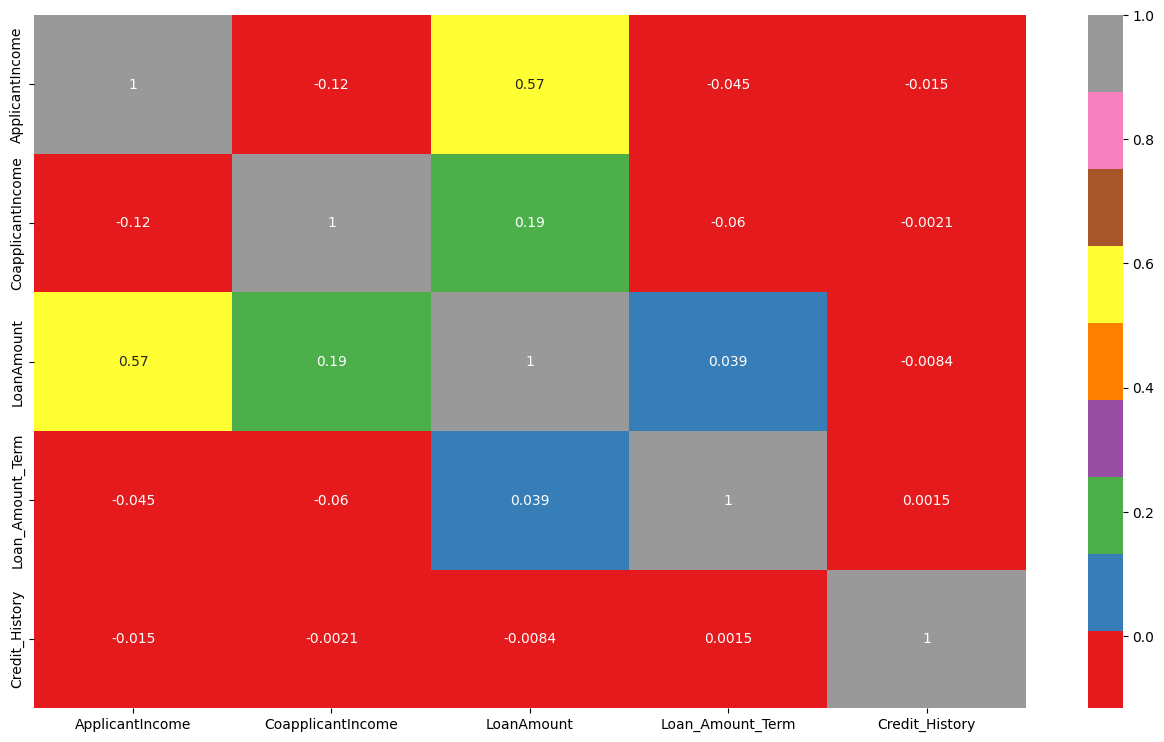

In [17]:
plt.figure(figsize=(16,9))
corr = data[data.describe().columns].corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()

In [44]:
# training and normalization of data
X = datas.iloc[:,:13].values
Y = datas.iloc[:,13:].values


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [45]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (6, 5)
Shape of X_test: (2, 5)


In [51]:
print(data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [52]:
data["Loan_Status"] = data["Loan_Status"].astype("category")
data.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status          category
dtype: object

In [53]:
# from sklearn.linear_model import LogisticRegressionCV
# model = LogisticRegressionCV(cv=8, max_iter=800)
# model.fit(X_train,Y_train)
# prediction = model.predict(X_test)
# from sklearn.preprocessing import OrdinalEncoder
# import pandas as pd
# ord_enc = OrdinalEncoder()
# data["Loan_Status"] = ord_enc.fit_transform(data[["Loan_Status"]])
# data

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
data["Loan_Status"] = label_enc.fit_transform(data["Loan_Status"])

In [54]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=8, max_iter=800)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

ValueError: Found array with 0 feature(s) (shape=(6, 0)) while a minimum of 1 is required.

In [34]:
test_data = data.iloc[101:102]
output = test_data['Loan_Status']
test_data.drop(['Loan_Status'], axis = 1, inplace = True)
print("Predicted Loan_Status = ",model.predict(test_data)[0])
print("Actual Loan_Status = ", output.values[0])

<ipython-input-34-58791598789d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Loan_Status'], axis = 1, inplace = True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'LP001349'

In [ ]:
print("The train accuracy score = ",round(model.score(X_train,Y_train)*100,2))
print("The test accuracy score = ",round(model.score(X_test,Y_test)*100,2))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(Y_test,prediction)
print(conf_matrix)

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test,prediction))